In [2]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts/"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"

input_col = "Input"
use_input = False
min_cell = 10


In [3]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
%matplotlib inline

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Control_AAACGAAAGAATCAGT-1,Control,1972,1972,6432,1259,31,19,266,1066,3791,...,6,2211,1942,AAACGAAAGAATCAGT-1_Control,Control_AAACGAAAGAATCAGT-1,4,1,Control,1_4,eosonophil
Control_AAACGAAAGCATACCT-1,Control,2674,2674,11858,1937,51,34,549,3102,6185,...,7,3311,2750,AAACGAAAGCATACCT-1_Control,Control_AAACGAAAGCATACCT-1,30,1,Control,1_30,MPP/CMP/GMP C
Control_AAACGAAAGCGAGAAA-1,Control,1939,1939,7365,1097,25,27,275,2184,3757,...,7,2112,1838,AAACGAAAGCGAGAAA-1_Control,Control_AAACGAAAGCGAGAAA-1,15,0,Control,0_15,MPP/CMP/GMP C
Control_AAACGAAAGTACAGAT-1,Control,862,862,4095,861,16,16,230,771,2201,...,4,1441,1317,AAACGAAAGTACAGAT-1_Control,Control_AAACGAAAGTACAGAT-1,9,0,Control,0_9,erythroid
Control_AAACGAAAGTACAGTA-1,Control,1775,1775,8088,1091,27,27,369,2157,4417,...,6,2385,2085,AAACGAAAGTACAGTA-1_Control,Control_AAACGAAAGTACAGTA-1,17,1,Control,1_17,eosonophil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3585,3585,17067,3257,63,80,461,8097,5109,...,3,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,6,0,Input,0_6,MPP/CMP/GMP B
Input_TTTGTGTTCCTGAAAC-1,Input,4362,4362,30427,8323,84,99,799,12146,8976,...,11,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,11,0,Input,0_11,MEP
Input_TTTGTGTTCGGGAAAC-1,Input,8047,8047,40114,14032,169,160,1561,10102,14090,...,3,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,37,0,Input,0_37,MPP/CMP/GMP B
Input_TTTGTGTTCGGGACAA-1,Input,3303,3303,22721,4421,43,84,546,11692,5935,...,4,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,3,1,Input,1_3,erythroid


In [6]:
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Control_AAACGAAAGAATCAGT-1,Control,1972,1972,6432,1259,31,19,266,1066,3791,...,6,2211,1942,AAACGAAAGAATCAGT-1_Control,Control_AAACGAAAGAATCAGT-1,4,1,Control,1_4,eosonophil
Control_AAACGAAAGCATACCT-1,Control,2674,2674,11858,1937,51,34,549,3102,6185,...,7,3311,2750,AAACGAAAGCATACCT-1_Control,Control_AAACGAAAGCATACCT-1,30,1,Control,1_30,MPP/CMP/GMP C
Control_AAACGAAAGCGAGAAA-1,Control,1939,1939,7365,1097,25,27,275,2184,3757,...,7,2112,1838,AAACGAAAGCGAGAAA-1_Control,Control_AAACGAAAGCGAGAAA-1,15,0,Control,0_15,MPP/CMP/GMP C
Control_AAACGAAAGTACAGAT-1,Control,862,862,4095,861,16,16,230,771,2201,...,4,1441,1317,AAACGAAAGTACAGAT-1_Control,Control_AAACGAAAGTACAGAT-1,9,0,Control,0_9,erythroid
Control_AAACGAAAGTACAGTA-1,Control,1775,1775,8088,1091,27,27,369,2157,4417,...,6,2385,2085,AAACGAAAGTACAGTA-1_Control,Control_AAACGAAAGTACAGTA-1,17,1,Control,1_17,eosonophil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3585,3585,17067,3257,63,80,461,8097,5109,...,3,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,6,0,Input,0_6,MPP/CMP/GMP B
Input_TTTGTGTTCCTGAAAC-1,Input,4362,4362,30427,8323,84,99,799,12146,8976,...,11,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,11,0,Input,0_11,MEP
Input_TTTGTGTTCGGGAAAC-1,Input,8047,8047,40114,14032,169,160,1561,10102,14090,...,3,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,37,0,Input,0_37,MPP/CMP/GMP B
Input_TTTGTGTTCGGGACAA-1,Input,3303,3303,22721,4421,43,84,546,11692,5935,...,4,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,3,1,Input,1_3,erythroid


In [7]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()
group_counts

nuclear_clusters  donor
CLP               0         177
                  1          44
DC                0         199
                  1          57
MEP               0         310
                  1         315
MPP/CMP/GMP       0         968
                  1        1025
MPP/CMP/GMP B     0        1353
                  1         590
MPP/CMP/GMP C     0         554
                  1         676
MPP/CMP/GMP D     0         182
                  1         196
eosonophil        0         692
                  1         630
erythroid         0         483
                  1        1004
macrophage        0        1183
                  1         820
meg/erythroid     0         564
                  1         809
monocyte          0         382
                  1         220
neutrophil        0        1085
                  1        1044
neutrophil B      0         487
                  1         490
dtype: int64

### Remove None before normalizing

In [8]:
def plots(df, name):
    f, ax =plt.subplots(figsize=(12,12))
    df.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax)
    plt.savefig(join(outdir, name+".barplot.png"))
    return

In [9]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=10]


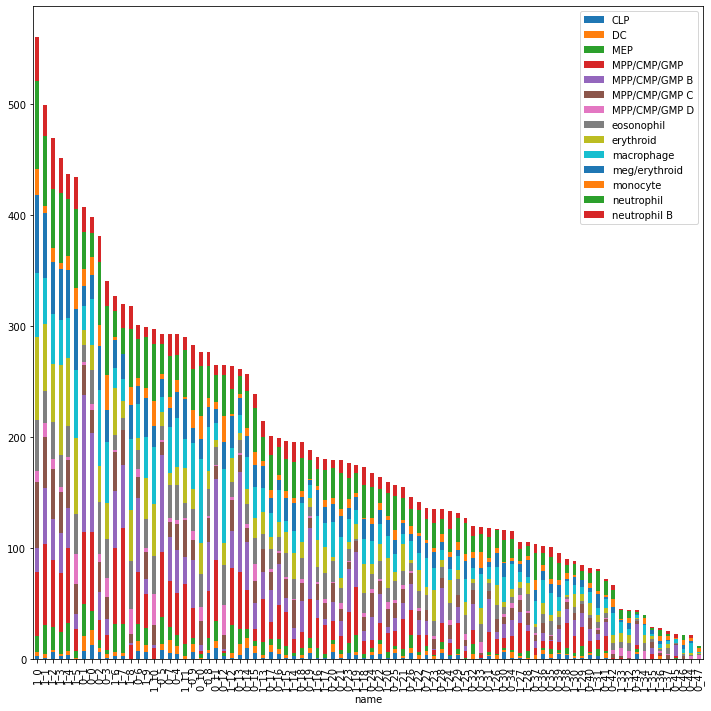

In [10]:
%matplotlib inline
plots(clone_counts_filt_10_df,
      name="clone_cluster_counts")

# Normalize per clone

In [11]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_sums

name
0_0     398
0_1     407
0_10    276
0_11    265
0_12    265
       ... 
1_5     434
1_6     327
1_7     320
1_8     318
1_9     299
Name: ncells, Length: 89, dtype: int64

In [12]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


sum of normed values nuclear_clusters  donor
CLP               0        0.994587
                  1        0.205156
DC                0        1.053104
                  1        0.315655
MEP               0        1.570355
                  1        1.305149
MPP/CMP/GMP       0        4.863151
                  1        4.537550
MPP/CMP/GMP B     0        7.280894
                  1        2.670252
MPP/CMP/GMP C     0        3.021657
                  1        3.105049
MPP/CMP/GMP D     0        1.509409
                  1        1.268538
eosonophil        0        4.043312
                  1        3.478237
erythroid         0        2.718411
                  1        4.665186
macrophage        0        7.762287
                  1        4.149063
meg/erythroid     0        3.399233
                  1        3.712336
monocyte          0        3.442608
                  1        1.372837
neutrophil        0        6.177633
                  1        5.020565
neutrophil B      0

,donor,ncells,CLP,DC,MEP,MPP/CMP/GMP,MPP/CMP/GMP B,MPP/CMP/GMP C,MPP/CMP/GMP D,eosonophil,erythroid,macrophage,meg/erythroid,monocyte,neutrophil,neutrophil B
name,,,,,,,,,,,,,,,,
0_0,0,1.0,0.030151,0.035176,0.042714,0.178392,0.223618,0.052764,0.015075,0.075377,0.057789,0.103015,0.055276,0.040201,0.055276,0.035176
0_5,0,1.0,0.027304,0.017065,0.085324,0.197952,0.300341,0.037543,0.006826,0.044369,0.040956,0.047782,0.054608,0.017065,0.092150,0.030717
1_21,1,1.0,0.006452,0.006452,0.045161,0.174194,0.090323,0.083871,0.019355,0.083871,0.154839,0.058065,0.064516,0.019355,0.129032,0.064516
1_20,1,1.0,0.006289,0.000000,0.031447,0.106918,0.037736,0.100629,0.037736,0.081761,0.169811,0.125786,0.088050,0.025157,0.125786,0.062893
1_2,1,1.0,0.012793,0.004264,0.044776,0.127932,0.078891,0.095949,0.019190,0.070362,0.113006,0.095949,0.100213,0.025586,0.113006,0.098081


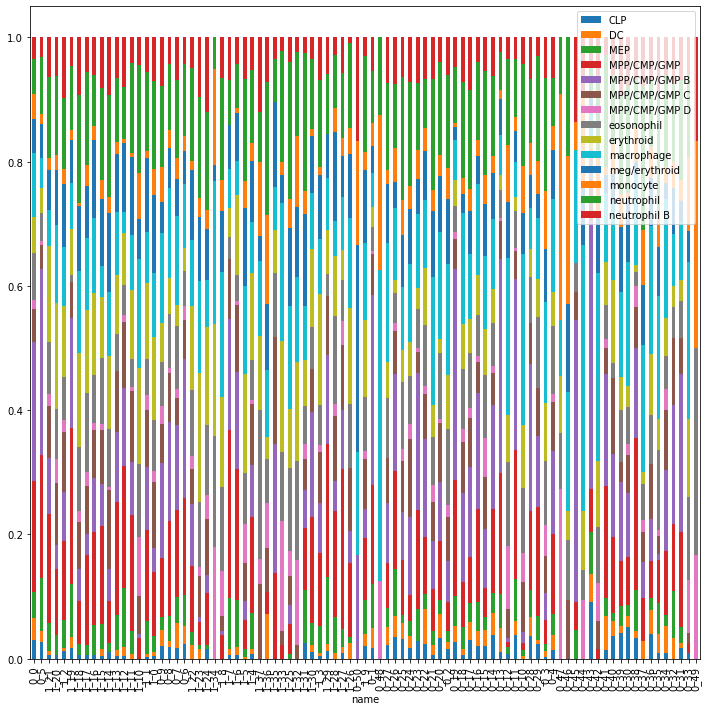

In [13]:
plots(clone_norm_df,
      name="normalized_counts")

## Only top clones

In [14]:
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

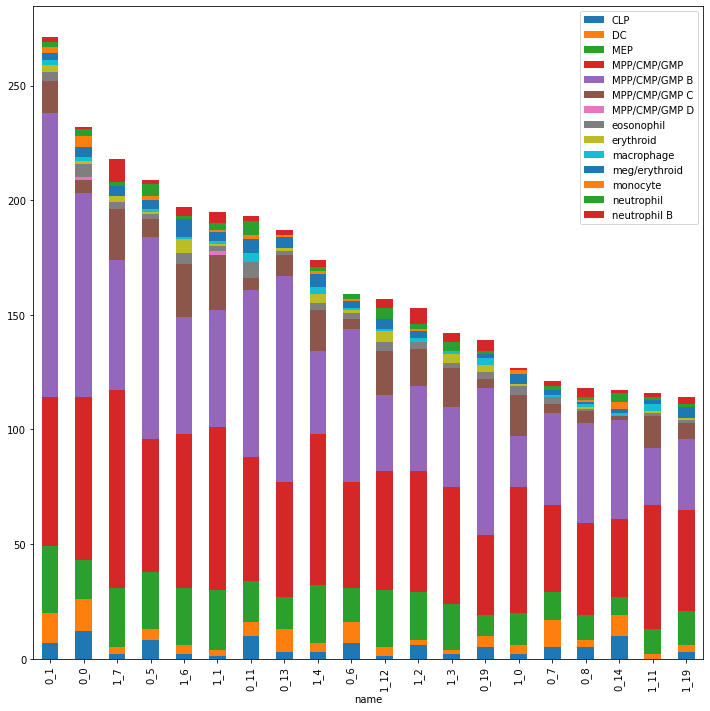

In [16]:
plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=min_cell),
      name=f"top20_minCell{min_cell}_clone_cluster_counts")

## Normalized

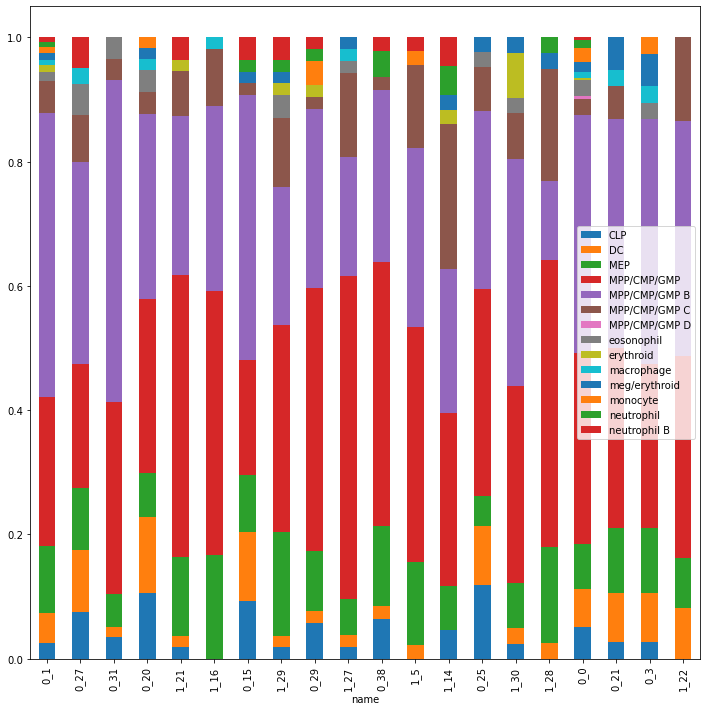

In [17]:
plots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
     name=f"top20_minCell{min_cell}_clone_normalized_counts")

---

---

---

---

## Split-by-donor

In [18]:
outdir

'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts/'